Tugas ini berupa mini project yang diselesaikan diakhir pertemuan bulan pertama. Tugas disusun sesuai dengan materi yang diberikan tiap harinya di pekan 4. 

# Dataset

silahkan unduh dataset berikut untuk mengerjakan tugas pekan 4:

[pelanggan_supermarket.csv](https://drive.google.com/uc?export=download&id=1jaxCbZ4fcCneeVCEN-yuxWE0RyX25tbQ)



---



---



---



In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [50]:
#Load data dari csv
df = pd.read_csv('pelanggan_supermarket.csv')
df

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0
...,...,...,...,...,...
245,246,Laki-laki,59.0,93,14.0
246,247,Laki-laki,35.0,93,90.0
247,248,Perempuan,37.0,97,32.0
248,249,Perempuan,32.0,97,86.0




---



---



---



# Soal 1. Statistika Deskriptif

Lakukan eksplorasi data dengan menggunakan statistika deskriptif. Gunakan pandas untuk mendapatkan summary statistics, dan analisa hasil yang ditampilkan.

In [51]:
df.describe()

,ID_pelanggan,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
count,250.000000,245.000000,250.000000,246.000000
mean,125.500000,38.730612,64.736000,50.325203
std,72.312977,14.328726,25.112324,28.668121
min,1.000000,18.000000,15.000000,3.000000
25%,63.250000,29.000000,47.000000,26.250000
50%,125.500000,36.000000,70.000000,50.000000
75%,187.750000,48.000000,78.750000,74.750000
max,250.000000,120.000000,137.000000,150.000000


**Expected output**

![](https://drive.google.com/uc?id=1-5_d0Ey1lWMXj0d8ABimuPqqTz-h-8mx)



---



---



---



# Soal 2. Handling missing value

Jika dilihat dari summary statistik terlihat dataset memiliki nilai missing. Hitunglah jumlah missing value menggunakan methode .isnull(). 

Isi nilai nan dengan nilai sebelumnya di row tersebut. gunakan method .fillna() dengan argument method bernilai 'ffill', baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

Cek keberadaan missing value sebelum imputasi

In [52]:
print(df.isna().sum())

ID_pelanggan                  0
Jenis Kelamin                 0
Umur                          5
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          4
dtype: int64


isi nilai nan dengan menggunakan metode 'ffill' 

In [53]:
fill_df = df.fillna(method='ffill')
fill_df

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0
...,...,...,...,...,...
245,246,Laki-laki,59.0,93,14.0
246,247,Laki-laki,35.0,93,90.0
247,248,Perempuan,37.0,97,32.0
248,249,Perempuan,32.0,97,86.0


Cek kembali keberadaan missing value setelah imputasi

In [54]:
print(fill_df.isnull().sum())

ID_pelanggan                  0
Jenis Kelamin                 0
Umur                          0
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          0
dtype: int64




---



---



---



# Soal 3. Handling outlier

1. Apakah data set memiliki nilai pencilan untuk setiap kolom? periksalah dengan melakukan visualisasi menggunakan boxplot.
2. Handling outlier tersebut dengan menggunakan teknik trimming / removing outliers (menggunakan teknik IQR)
3. Teknik ini akan menghasilkan nilai missing pada nilai outlier yang telah dihapus, maka hapuslah data missing tersebut dengan menggunakan method .dropna()

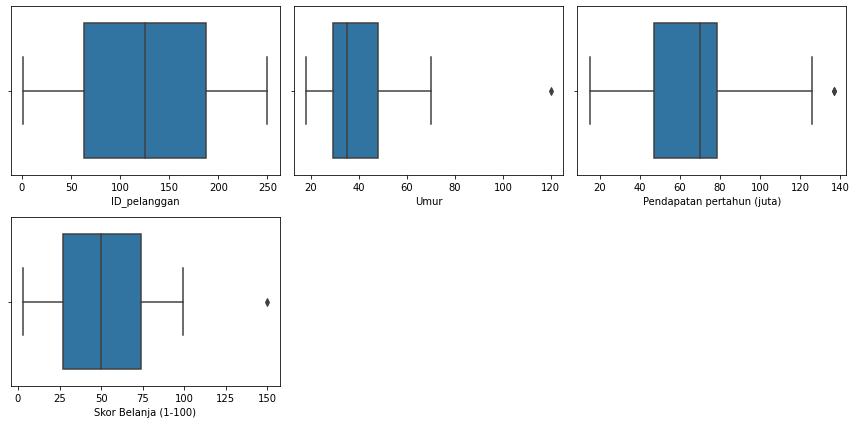

In [55]:
#Tampilkan Boxplot masing-masing kolom berisi data kuantitatif sebelum handling outlier
#Jenis plot yang digunakan adalah boxplot seaborn
plt.figure(figsize=(12,6))

for i, col in enumerate(fill_df.describe().columns):
    plt.subplot(2,3, i+1)
    sns.boxplot(x=fill_df[col])
    plt.tight_layout()

plt.show()

In [56]:
#Hilangkan Outlier dan tampilkan dataframe hasil menghilangkan outliernya

def get_Outliers_index(dframe):
    
    outliers_index = []
    for col in dframe.describe().columns:
        Q1 = dframe[col].quantile(0.25)
        Q3 = dframe[col].quantile(0.75)
    
        IQR = Q3-Q1
    
        lower_limit = Q1-(1.5*IQR)
        upper_limit = Q3+(1.5*IQR)
    
        outliers = dframe[ (dframe[col]<lower_limit) | (dframe[col]>upper_limit) ].index
        outliers_index.extend(outliers.to_list())
    
    outliers_index = set(outliers_index)  #Convert to set to remove duplicate numbers
    outliers_index = list(outliers_index) #Convert the set back to list
    
    outliers_index.sort()                 #Sort the list
    
    return outliers_index

In [57]:
get_Outliers_index(fill_df)

[16, 198, 199, 249]

In [58]:
df_drop_outlier = get_Outliers_index(fill_df)

fill_df.drop(df_drop_outlier, inplace=True)

In [59]:
df_drop_outlier = fill_df.drop(['Jenis Kelamin','ID_pelanggan'], axis = 1)
df_drop_outlier

,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,19.0,15,39.0
1,21.0,15,81.0
2,20.0,16,6.0
3,23.0,16,77.0
4,31.0,17,40.0
...,...,...,...
244,27.0,88,69.0
245,59.0,93,14.0
246,35.0,93,90.0
247,37.0,97,32.0


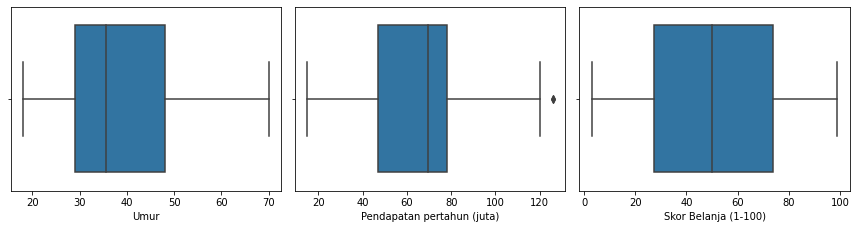

In [60]:
#Tampilkan Boxplot masing-masing kolom berisi data kuantitatif sesudah handling outlier
#Kolom ID Pelanggan tidak ikut ditampilkan

plt.figure(figsize=(12,6))

for i, j in enumerate(df_drop_outlier.describe().columns):
    plt.subplot(2,3, i+1)
    sns.boxplot(x=df_drop_outlier[j])
    plt.tight_layout()
    
plt.show()

**Expected output**

- **Melihat adanya pencilan menggunakan Boxplot (Sebelum hapus outlier):**

![](https://drive.google.com/uc?id=1ettD4G8xBMCYcMUVt88kn5k_yCufgdyf)

- **Data frame setelah menghapus outlier:**

![](https://puu.sh/IIOxx/b0d9c3d73e.png)

- **Melihat adanya pencilan menggunakan Boxplot (Setelah hapus outlier):**
![](https://puu.sh/IIOA5/de25854dfa.png)



---



---



---



# Soal 4. statistika Inferential



*   Kita akan melakukan hipotesis terhadap 100 sample pengunjung Supermarket. Hipotesis awal adalah rata2 usia pengunjung supermarket adalah 35 tahun. Ujilah hipotesis tersebut dengan menggunakan teknik probabilitas p-value)!
*   Level significat value acuan (disebut juga level alpha) adalah 5%
*   Gunakan variabel dataframe **hasil handling missing value dan outlier dari soal sebelumnya**
*   Berikan uraian analisis uji hipotesis menggunakan teknik p-value (untuk mendapatkan nilai p-value, silahkan gunakan fungsi **"ztest"** dari library **statsmodels.stats.weightstats**)
*   Untuk mempermudah perhitungan, ubahlah tipe data kolom Umur menjadi int dengan menggunakan methode .astype() baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html





In [61]:
#Lakukan sampling
#Isi bagian yang kosong dengan nama dataframe tempat anda menyimpan hasil no. 3

df_100 = df_drop_outlier.sample(100,  random_state=1)
df_100

,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
68,19.0,48,59.0
248,32.0,97,86.0
211,25.0,77,12.0
225,30.0,78,4.0
91,18.0,59,41.0
...,...,...,...
5,22.0,17,76.0
184,41.0,99,39.0
186,54.0,101,24.0
49,31.0,40,42.0


In [62]:
#Ubah value kolom Umur dari float menjadi integer

df_umur_int = df_100.astype({'Umur': 'int32'})
df_umur_int

,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
68,19,48,59.0
248,32,97,86.0
211,25,77,12.0
225,30,78,4.0
91,18,59,41.0
...,...,...,...
5,22,17,76.0
184,41,99,39.0
186,54,101,24.0
49,31,40,42.0


In [63]:
# menggunakan teknik p-value
# Isi bagian yang kosong

from statsmodels.stats.weightstats import ztest

z_test, p_value = ztest(x1 = df_umur_int['Umur'], value = 35)

#print the Results
print(f'Z-test is :{z_test}')
print(f'p-value is :{p_value}')

Z-test is :2.4874107887154624
p-value is :0.012867672183696988


**Expected Output:**

Z-Test is: 2.48741...
<br>P-value is: 0.01286767...

<br>\[Uraian analisis berdasarkan p-value\]

- Berdasarkan hasil pengujian 100 sample pengunjung supermarket terhadap value rata-rata umur 35 dengan menggunakan Z-test, didapatkan P-Value sebesar 1,2%. 

- Dengan P-Value kita mengetahui bahwa probabilitas kesalahan terhadap pengujian bahwa rata-rata umur pengunjung supermarket adalah 35 tahun adalah sebesar 1,2%.

- Nilai P(1,2%) yang berada di bawah nilai Alpha (5%), menunjukkan bahwa rata-rata usia pengunjung supermarket adalah berumur 35 tahun cenderung tepat dan sesuai hipotesis awal



---



---



---



## Soal 5. EDA

### 5.a. Univariate Analysis

Lakukan eksplorasi data analisis. Gunakan visualisasi distplot untuk melihat sebaran data dan histogram pada setiap kolom **dataset awal sebelum dilakukan handling missing value maupun outlier**.
<br><br>
Jenis plot yang digunakan adalah distplot seaborn

In [64]:
df.describe()

,ID_pelanggan,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
count,250.000000,245.000000,250.000000,246.000000
mean,125.500000,38.730612,64.736000,50.325203
std,72.312977,14.328726,25.112324,28.668121
min,1.000000,18.000000,15.000000,3.000000
25%,63.250000,29.000000,47.000000,26.250000
50%,125.500000,36.000000,70.000000,50.000000
75%,187.750000,48.000000,78.750000,74.750000
max,250.000000,120.000000,137.000000,150.000000


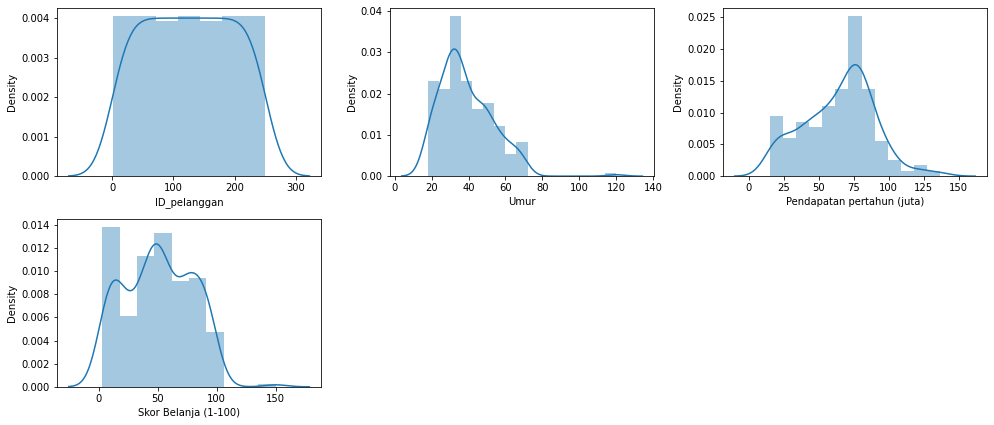

In [65]:
#Tampilkan Boxplot masing-masing kolom berisi data kuantitatif sebelum handling outlier
#Jenis plot yang digunakan adalah boxplot seaborn
plt.figure(figsize=(14,6))

for i, col in enumerate(df.describe().columns):
    plt.subplot(2,3, i+1)
    sns.distplot(x=df[col])
    plt.xlabel(col)
    plt.tight_layout()

plt.show()

**Expected Output:**

![](https://puu.sh/IIOGG/54e31ca7e0.png)

\[Uraian analisis berdasarkan output grafik analisis univariat yang didapat\]

Berasarkan hasil grafik di atas menunjukkan bahwa:
- Sebaran ID_pelanggan cukup merata dari 0 hingga 250, hal ini dikarenakan terdapat 250 pelanggan dengan ID yang berbeda dan berurutan.
- Sebaran umur memiliki mode tertinggi di sekitar umur 36 tahun dan terdapat mode umur outlier pada value sekitar 120
- Sebaran pendapatan pertahun memiliki nilai mode di sekitar 75 juta
- Sebaran skor belanja memiliki nilai mode di angka 50, namun memiliki data outlier di sekitar 150

---

### 5.b. Bivariate Analysis

Lakukan eksplorasi data analisis. Gunakan visualisasi barplot untuk melihat perbandingan skor belanja antara pengunjung perempuan dengan pengunjung lai-laki pada dataset awal **sebelum dilakukan handling missing value maupun outlier**

#### > Sort dataframe berdasarkan Skor Belanja, dari besar ke kecil


In [66]:
df

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0
...,...,...,...,...,...
245,246,Laki-laki,59.0,93,14.0
246,247,Laki-laki,35.0,93,90.0
247,248,Perempuan,37.0,97,32.0
248,249,Perempuan,32.0,97,86.0


In [67]:
skor = df.sort_values(by=['Skor Belanja (1-100)'], ascending=False)

#### > Tampilkan 5 data teratasnya

In [68]:
skor.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
16,17,Perempuan,35.0,21,150.0
11,12,Perempuan,35.0,19,99.0
19,20,Perempuan,35.0,23,98.0
185,186,Laki-laki,30.0,99,97.0
145,146,Laki-laki,28.0,77,97.0


#### > Tampilkan 5 data terbawahnya

In [69]:
skor.tail()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
8,9,Laki-laki,64.0,19,3.0
49,50,Perempuan,31.0,40,NaN
61,62,Laki-laki,19.0,46,NaN
94,95,Perempuan,32.0,60,NaN
117,118,Perempuan,49.0,65,NaN


#### > Buat grafiknya menggunakan barplot seaborn

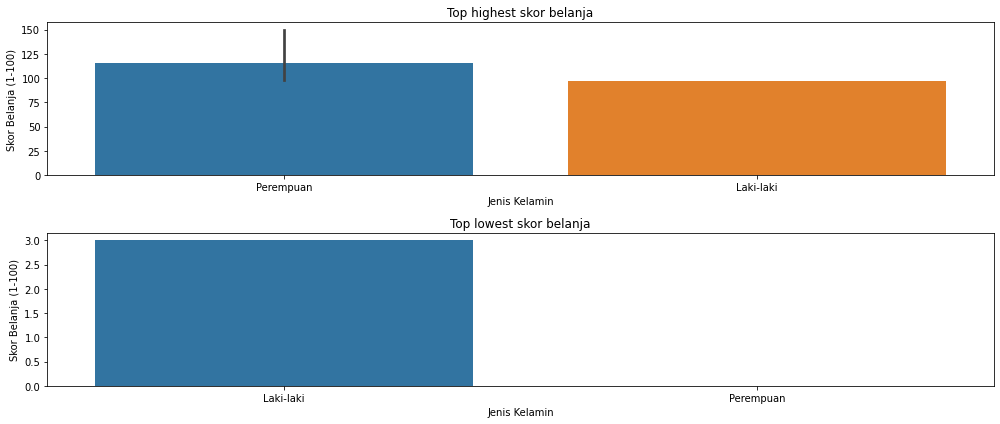

In [70]:
fig, axes = plt.subplots(2, 1, figsize=(14,6))
sns.barplot(data=skor.head(), y='Skor Belanja (1-100)', x='Jenis Kelamin', ax=axes[0]).set(title='Top highest skor belanja')
sns.barplot(data=skor.tail(), y='Skor Belanja (1-100)', x='Jenis Kelamin', ax=axes[1]).set(title='Top lowest skor belanja')
plt.tight_layout()

**Expected output:**

![](https://puu.sh/IIOLu/8c1c76b5e4.png)

\[Uraian analisis dari grafik bivariat yang didapat\]

pada grafik di atas menunjukkan bahwa top highest skor belanja perempuan lebih tinggi daripada laki, sementara pada top lowest skor belanja laki-laki lebih tinggi daripada perempuan yang memiliki nilai nol.

Dapat disimpulkan bahwa berdasarkan hasil analisa data supermarket tersebut, wanita lebih cenderung suka berbelanja ketimbang laki-laki 

---

### 5.c. Multivariate Analysis

Lakukan eksplorasi data analisis. Gunakan visualisasi heatmap sebagai multivariate analisis untuk melihat korelasi tertinggi dari setiap data pada dataset awal **sebelum dilakukan handling missing value maupun outlier**

Plot menggunakan heatmap seaborn.

<AxesSubplot:>

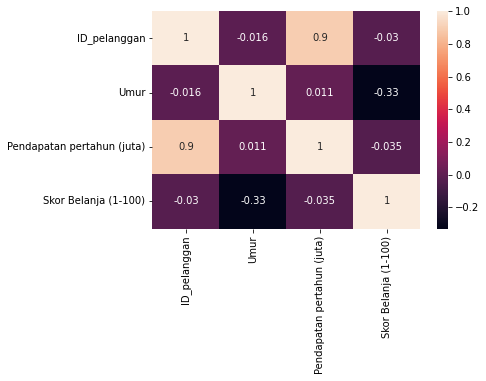

In [71]:
#Isi bagian yang kosong

sns.heatmap(df.corr(), annot=True, fmt='.2g')

**Expected Output:**

![](https://puu.sh/IIOQG/57c5ba3219.png)

\[Uraian analisis dari grafik multivariat yang didapat\]

Berdasarkan hasil analisa visualisasi heatmap, nilai korelasi antar column umur, pendapatan pertahun, dan skor belanja, cenderung rendah bahkan terdapat nilai minum. Hal ini menunjukkan bahwa faktor umur dan pendapatan pertahun tidak terlalu berkorelasi terhadap skor belanja.



---

---



---





# Soal 6
lakukan scaling data dengan menggunakan standarisasi untuk kolom Umur dan skor belanja saja tetapi **menggunakan variabel dataframe setelah handling missing value dan outlier**

In [72]:
#feature scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

output = scaler.fit_transform(df_drop_outlier[['Umur','Skor Belanja (1-100)']])

In [73]:
output

array([[-1.45540807e+00, -3.96862497e-01],
       [-1.30503831e+00,  1.12123573e+00],
       [-1.38022319e+00, -1.58965396e+00],
       [-1.15466856e+00,  9.76654949e-01],
       [-5.53189542e-01, -3.60717301e-01],
       [-1.22985343e+00,  9.40509753e-01],
       [-2.52450034e-01, -1.58965396e+00],
       [-1.15466856e+00,  1.59112328e+00],
       [ 1.92791140e+00, -1.69808955e+00],
       [-6.28374419e-01,  7.95928969e-01],
       [ 2.15346603e+00, -1.30049240e+00],
       [-2.52450034e-01,  1.77184926e+00],
       [ 1.47680214e+00, -1.26434720e+00],
       [-1.07948368e+00,  9.76654949e-01],
       [-1.02080280e-01, -1.33663759e+00],
       [-1.22985343e+00,  1.04894534e+00],
       [-1.38022319e+00,  5.79057793e-01],
       [ 1.02569287e+00, -7.58314456e-01],
       [-2.52450034e-01,  1.73570406e+00],
       [-2.52450034e-01, -5.41443281e-01],
       [-1.00429880e+00,  8.32074165e-01],
       [ 5.74583613e-01, -1.62579916e+00],
       [-5.53189542e-01,  8.32074165e-01],
       [ 1.

**Expected Output (Hasil yang ditampilkan hanya sebagian):**

![](https://puu.sh/IIOZx/c4bae0561e.png)



---



---



---



# Soal 7

*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut

In [74]:
output_df = pd.DataFrame(output)
output_df

,0,1
0,-1.455408,-0.396862
1,-1.305038,1.121236
2,-1.380223,-1.589654
3,-1.154669,0.976655
4,-0.553190,-0.360717
...,...,...
241,-0.853929,0.687493
242,1.551987,-1.300492
243,-0.252450,1.446542
244,-0.102080,-0.649879


Clustering n=2

In [75]:
scalled_output_df_k2 = pd.DataFrame(output, columns=['Umur','Skor Belanja (1-100)'])
scalled_output_df_k2

,Umur,Skor Belanja (1-100)
0,-1.455408,-0.396862
1,-1.305038,1.121236
2,-1.380223,-1.589654
3,-1.154669,0.976655
4,-0.553190,-0.360717
...,...,...
241,-0.853929,0.687493
242,1.551987,-1.300492
243,-0.252450,1.446542
244,-0.102080,-0.649879


In [76]:
#clustering n=2

from sklearn.cluster import KMeans

k=2

kmeans_n2 = KMeans(n_clusters=k)
model_a = kmeans_n2.fit(output)
model_a

KMeans(n_clusters=2)

In [77]:
label_a = kmeans_n2.fit_predict(output_df)
label_a_scalled_df = pd.DataFrame(label_a)

In [78]:
scalled_output_df_k2['label_scalled_2'] = label_a_scalled_df
scalled_output_df_k2

,Umur,Skor Belanja (1-100),label_scalled_2
0,-1.455408,-0.396862,0
1,-1.305038,1.121236,0
2,-1.380223,-1.589654,1
3,-1.154669,0.976655,0
4,-0.553190,-0.360717,0
...,...,...,...
241,-0.853929,0.687493,0
242,1.551987,-1.300492,1
243,-0.252450,1.446542,0
244,-0.102080,-0.649879,1


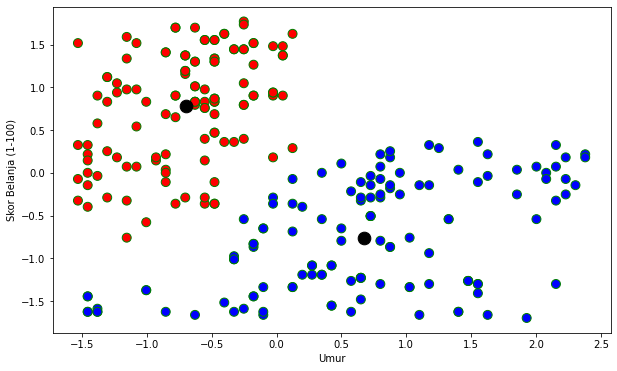

In [79]:
#visualisasi n=2 beserta centroid-centroidnya

fig, ax = plt.subplots(figsize=(10,6))
centers = kmeans_n2.cluster_centers_

colorDict = {0:'red', 1:'blue'}

# plot data
ax.scatter(scalled_output_df_k2['Umur'], scalled_output_df_k2['Skor Belanja (1-100)'], c=scalled_output_df_k2['label_scalled_2'].map(colorDict), s=80, marker='o', edgecolor ="green")

#plot the centroids
plt.scatter(centers[:,0], centers[:,1], c = 'black', s = 160);

ax.set_ylabel('Skor Belanja (1-100)')
ax.set_xlabel('Umur')

plt.show()

Elbow method

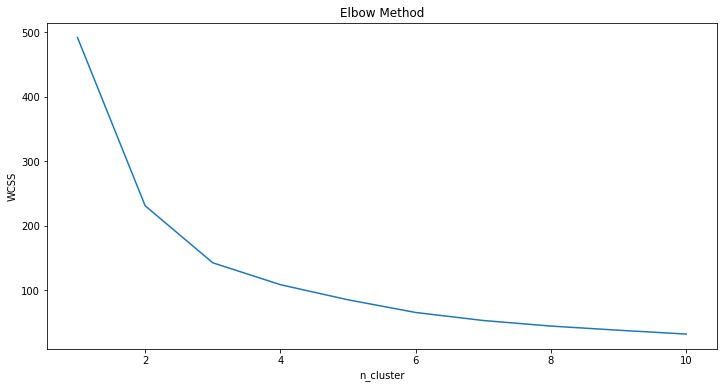

In [80]:
#elbow method beserta visualisasinya

distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(output_df)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(12,6))
plt.plot(K, distortions)
plt.xlabel('n_cluster')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

Clustering N=3

In [81]:
scalled_output_df_k3 = pd.DataFrame(output, columns=['Umur','Skor Belanja (1-100)'])
scalled_output_df_k3

,Umur,Skor Belanja (1-100)
0,-1.455408,-0.396862
1,-1.305038,1.121236
2,-1.380223,-1.589654
3,-1.154669,0.976655
4,-0.553190,-0.360717
...,...,...
241,-0.853929,0.687493
242,1.551987,-1.300492
243,-0.252450,1.446542
244,-0.102080,-0.649879


In [82]:
#clustering n=3

from sklearn.cluster import KMeans

k=3

kmeans_n3 = KMeans(n_clusters=k)
model_b = kmeans_n3.fit(output)
model_b

KMeans(n_clusters=3)

In [83]:
label_b = kmeans_n3.fit_predict(output_df)
label_b_scalled_df = pd.DataFrame(label_b)

In [84]:
scalled_output_df_k3['label_scalled_3'] = label_b_scalled_df
scalled_output_df_k3

,Umur,Skor Belanja (1-100),label_scalled_3
0,-1.455408,-0.396862,0
1,-1.305038,1.121236,2
2,-1.380223,-1.589654,0
3,-1.154669,0.976655,2
4,-0.553190,-0.360717,0
...,...,...,...
241,-0.853929,0.687493,2
242,1.551987,-1.300492,1
243,-0.252450,1.446542,2
244,-0.102080,-0.649879,0


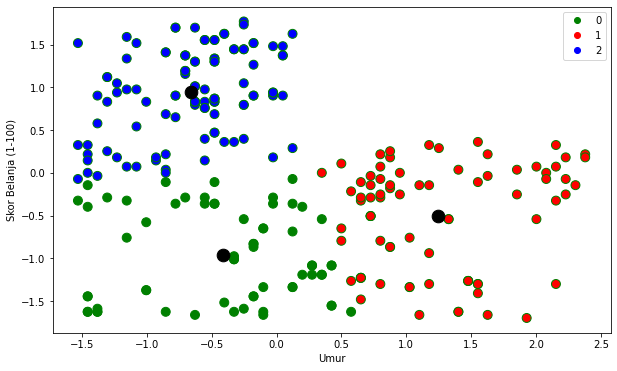

In [85]:
#visualisasi n=3 beserta centroid-centroidnya

fig, ax = plt.subplots(figsize=(10,6))
centers = kmeans_n3.cluster_centers_

colorDict = {0:'green', 1:'red', 2:'blue'}

# plot data
ax.scatter(scalled_output_df_k3['Umur'], scalled_output_df_k3['Skor Belanja (1-100)'], c=scalled_output_df_k3['label_scalled_3'].map(colorDict), s=80, marker='o', edgecolor ="green")

#plot the centroids
plt.scatter(centers[:,0], centers[:,1], c = 'black', s = 160);

markers = [plt.Line2D([0,0],[0,0], color=color, marker='o', linestyle='') for color in colorDict.values()]

plt.legend(markers, list(colorDict.keys())[:3])
ax.set_ylabel('Skor Belanja (1-100)')
ax.set_xlabel('Umur')

plt.show()

In [86]:
#tampilan silhoutte score untuk n=2 dan n=3
from sklearn.metrics import silhouette_score

skor_siluet_a = silhouette_score(output_df, label_a)
skor_siluet_b = silhouette_score(output_df, label_b)

print(f'silhouette score for K = 2 is ', skor_siluet_a)
print(f'silhouette score for K = 3 is ', skor_siluet_b)

silhouette score for K = 2 is  0.48547668843696046
silhouette score for K = 3 is  0.46322118979522214


**Expected output**

cluster 2

![](https://drive.google.com/uc?id=1L7nIskGXbeXGhKOzhMWCykJ4jY5538mn)

elbow method

![](https://drive.google.com/uc?id=1a3OL9FhiQ2-DyJQ8sg8PNzfS9QsszyvU)

cluster 3

![](https://drive.google.com/uc?id=1UR6vK36oLJinLPtechjJJBtxifmdFOSn)

---
---
---

## Soal 8. Analyze clustering result

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk targetted market supermarket.
Langkah-langkah:

* Buatlah dataframe hasil inverse scaling dari hasil pengerjaan no. 6
* Masukkan label hasil clustering K=3 ke data frame baru ini.
* Tampilkan kembali scatterplot berdasarkan data frame baru ini
* Buatlah uraian analisa dari grafik tersebut
* Berikan rekomendasi kepada manajemen supermarket tersebut untuk meningkatkan penjualan

In [87]:
#Inverse transform hasil pengerjaan no. 6 kemudian jadikanlah dataframe
inv_scaled = scaler.inverse_transform(output)
inv_scaled

array([[19., 39.],
       [21., 81.],
       [20.,  6.],
       [23., 77.],
       [31., 40.],
       [22., 76.],
       [35.,  6.],
       [23., 94.],
       [64.,  3.],
       [30., 72.],
       [67., 14.],
       [35., 99.],
       [58., 15.],
       [24., 77.],
       [37., 13.],
       [22., 79.],
       [20., 66.],
       [52., 29.],
       [35., 98.],
       [35., 35.],
       [25., 73.],
       [46.,  5.],
       [31., 73.],
       [54., 14.],
       [29., 82.],
       [45., 32.],
       [35., 61.],
       [40., 31.],
       [23., 87.],
       [60.,  4.],
       [21., 73.],
       [53.,  4.],
       [18., 92.],
       [49., 14.],
       [21., 81.],
       [42., 17.],
       [30., 73.],
       [36., 26.],
       [20., 75.],
       [65., 35.],
       [24., 92.],
       [48., 36.],
       [31., 61.],
       [49., 28.],
       [24., 65.],
       [50., 55.],
       [27., 47.],
       [29., 42.],
       [31., 42.],
       [49., 52.],
       [33., 60.],
       [31., 54.],
       [59.,

In [88]:
#label hasil klustering k=3
df_label_b = pd.DataFrame(label_b)
df_label_b

,0
0,0
1,2
2,0
3,2
4,0
...,...
241,2
242,1
243,2
244,0


In [89]:
#membuat dataframe baru hasil inverse scalling

new_df1 = pd.DataFrame(data=inv_scaled,
                       columns=['Umur','Skor Belanja (1-100)'])
new_df1

,Umur,Skor Belanja (1-100)
0,19.0,39.0
1,21.0,81.0
2,20.0,6.0
3,23.0,77.0
4,31.0,40.0
...,...,...
241,27.0,69.0
242,59.0,14.0
243,35.0,90.0
244,37.0,32.0


In [90]:
# menambahkan label k3 ke dataframe

new_df1['label_k3'] = df_label_b
new_df1

,Umur,Skor Belanja (1-100),label_k3
0,19.0,39.0,0
1,21.0,81.0,2
2,20.0,6.0,0
3,23.0,77.0,2
4,31.0,40.0,0
...,...,...,...
241,27.0,69.0,2
242,59.0,14.0,1
243,35.0,90.0,2
244,37.0,32.0,0


Tampilkan dalam scatterplot

In [91]:

#feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

neo_output = scaler.fit_transform(new_df1[['Umur','Skor Belanja (1-100)']])

neo_output

array([[-1.45540807e+00, -3.96862497e-01],
       [-1.30503831e+00,  1.12123573e+00],
       [-1.38022319e+00, -1.58965396e+00],
       [-1.15466856e+00,  9.76654949e-01],
       [-5.53189542e-01, -3.60717301e-01],
       [-1.22985343e+00,  9.40509753e-01],
       [-2.52450034e-01, -1.58965396e+00],
       [-1.15466856e+00,  1.59112328e+00],
       [ 1.92791140e+00, -1.69808955e+00],
       [-6.28374419e-01,  7.95928969e-01],
       [ 2.15346603e+00, -1.30049240e+00],
       [-2.52450034e-01,  1.77184926e+00],
       [ 1.47680214e+00, -1.26434720e+00],
       [-1.07948368e+00,  9.76654949e-01],
       [-1.02080280e-01, -1.33663759e+00],
       [-1.22985343e+00,  1.04894534e+00],
       [-1.38022319e+00,  5.79057793e-01],
       [ 1.02569287e+00, -7.58314456e-01],
       [-2.52450034e-01,  1.73570406e+00],
       [-2.52450034e-01, -5.41443281e-01],
       [-1.00429880e+00,  8.32074165e-01],
       [ 5.74583613e-01, -1.62579916e+00],
       [-5.53189542e-01,  8.32074165e-01],
       [ 1.

In [92]:
# merubah hasil scalling neo_output ke dataframe

neo_output_df = pd.DataFrame(neo_output)
neo_output_df

,0,1
0,-1.455408,-0.396862
1,-1.305038,1.121236
2,-1.380223,-1.589654
3,-1.154669,0.976655
4,-0.553190,-0.360717
...,...,...
241,-0.853929,0.687493
242,1.551987,-1.300492
243,-0.252450,1.446542
244,-0.102080,-0.649879


In [93]:
#Import module
from sklearn.cluster import KMeans
 
#Initialize the class object
neo_kmeans_n3 = kmeans_n3

model_c = neo_kmeans_n3.fit(neo_output_df)
model_c

KMeans(n_clusters=3)

In [94]:
#predict the labels of clusters.

label_c = neo_kmeans_n3.fit_predict(neo_output_df)
label_c

array([0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 0, 1, 0,
       1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2,
       1, 2, 0, 0, 0, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2,
       2, 1, 0, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1,
       2, 2, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2,
       1, 0, 0, 1, 1, 2, 2, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2,
       1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2,
       0, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1,
       0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 0, 1])

In [95]:
neo_filtered_label0 = neo_output_df[label_c == 0]
neo_filtered_label1 = neo_output_df[label_c == 1]
neo_filtered_label2 = neo_output_df[label_c == 2]

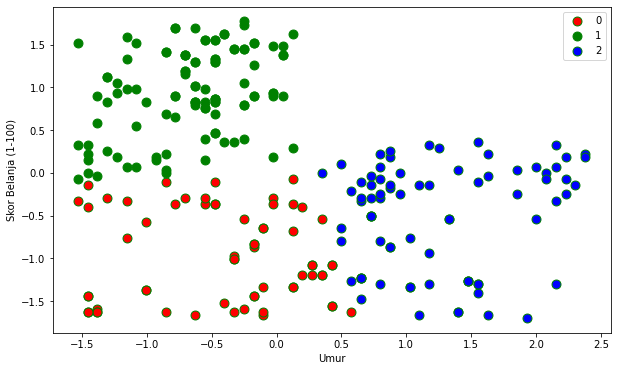

In [96]:
#Tampilkan dalam scatterplot

fig, ax = plt.subplots(figsize=(10,6))

plt.scatter(neo_filtered_label0[0] , neo_filtered_label0[1], s=80, c='red', marker ="o", edgecolor ="green", label=0)
plt.scatter(neo_filtered_label1[0], neo_filtered_label1[1], s=80, c='green', marker ="o", edgecolor ="green", label=1)
plt.scatter(neo_filtered_label2[0] , neo_filtered_label2[1], s=80, c='blue', marker ="o", edgecolor ="green", label=2)

plt.legend()
ax.set_ylabel('Skor Belanja (1-100)')
ax.set_xlabel('Umur')

plt.show()

\[Tulis uraian analisis grafik yang sudah anda buat di sini\]

Analisa dari grafik di atas adalah sebagai berikut:

- Terdapat 3 cluster pengunjung supermarket yang tepat berdasarkan hasil analisa grafik dengan menggunakan elbow method
- Cluster pertama pengunjung supermarket memiliki rentang usia 18 hingga 40 tahun dengan skor belanja di atas 40
- Cluster kedua pengunjung supermarket memiliki rentang usia 18 hingga 50 tahun dengan skor belanja 0 hingga 50
- Cluster kedua pengunjung supermarket memiliki rentang usia 42 hingga 72 tahun dengan skor belanja dari 0 hingga 62

**Expected Output:**

* Dataframe hasil inverse scaling (hasil urutan nomor label mungkin berbeda, tapi tetap terdiri dari 0, 1, dan 2) <br>
![](https://puu.sh/IN3jl/3d2c66f2de.png)

* Grafik dari data frame tersebut, warna boleh berbeda, tapi perhatikan angka pada sumbu x dan y: <br>
![](https://puu.sh/IIPUx/d953c4760f.png)

* Uraian analisis & rekomendasi
<br>\[Tulis apa informasi yang kalian dapat dari grafik tersebut dan sertakan rekomendasi kalian untuk meningkatkan penjualan supermarket ini\]

- Berdasarkan analisa grafik di atas, terdapat dua cluster pengunjung supermarket yang memiliki skor belanja yang rendah (0-62).
- Untuk meningkatkan skor belanja, maka dapat ditingkatkan marketing product sesuai dua cluster yang memiliki skor rendah tersebut
- Supermarket juga dapat menyediakan barang-barang yang umum dibutuhkan oleh cluster ketiga yang memiliki rentang usia 42 hingga 72 tahun